## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://storage.teklia.com/shared/deepnlp-labs/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE
df = pd.read_csv("https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz")
df.head()

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


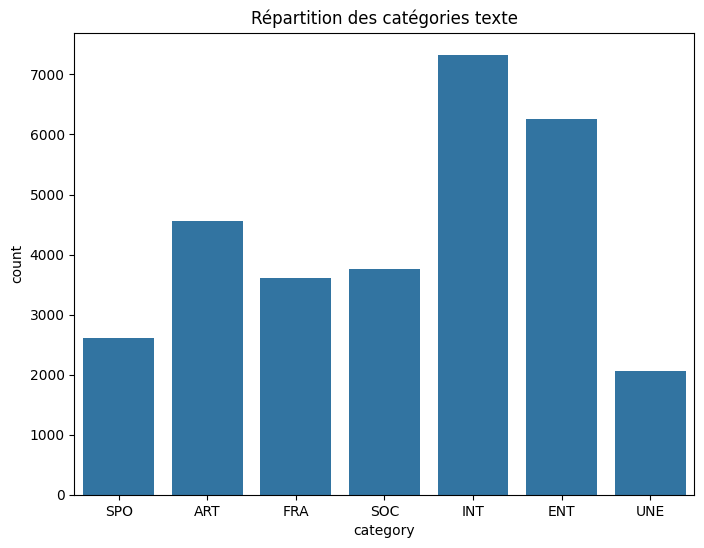

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='category')
plt.title('Répartition des catégories texte')
plt.show()

In [3]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE

print(df[['text', 'category']].head(10))

In [4]:
from wordcloud import WordCloud

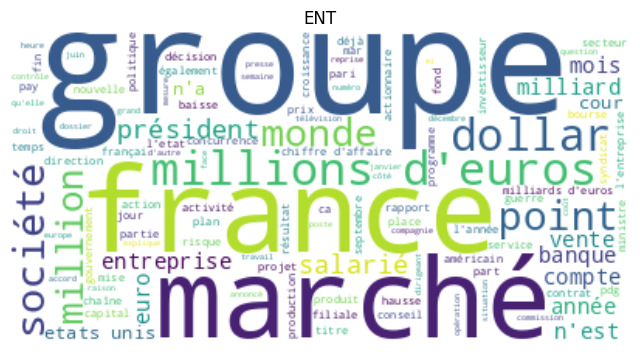

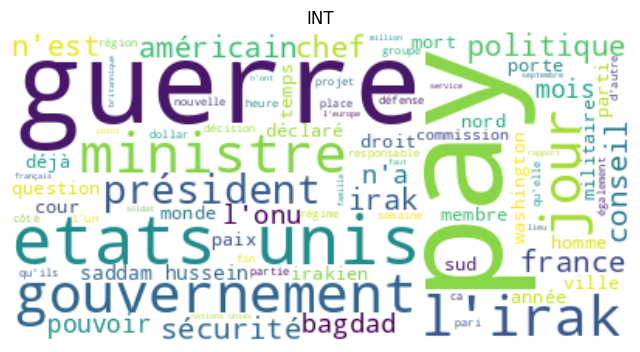

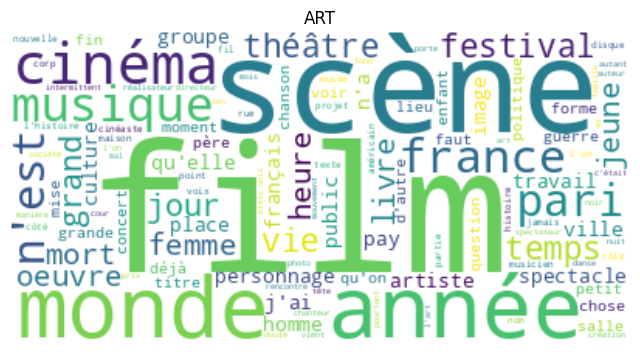

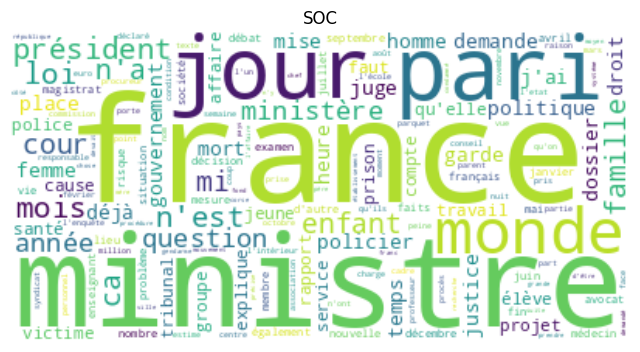

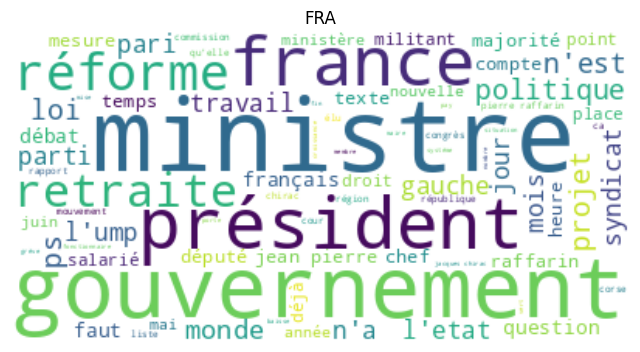

In [5]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    texts = df[df['category'] == cat]['text']  # filtrer textes pour cette catégorie
    all_text = " ".join(texts)                # concaténer en un seul string

    wc = WordCloud(stopwords=STOPWORDS, background_color="white").generate(all_text)

    plt.figure(figsize=(8,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(cat)
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [10]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
X = df["text"]
y = df["category"]
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# split dev and test
X_dev, X_test, y_dev, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [11]:
df.shape

(30165, 2)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)  
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object

# fit on train data
vectorizer.fit(X_train)
# apply it on train and dev data
X_train_vec = vectorizer.transform(X_train)
X_dev_vec   = vectorizer.transform(X_dev)


In [13]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
# Train 
clf.fit(X_train_vec,y_train)
# Evaluate 
clf.score(X_dev_vec,y_dev)


0.7314323607427056

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer()
 	X_train_tf = tf_transformer.fit_transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE

tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_vec)
X_dev_tf = tf_transformer.transform(X_dev_vec)

In [15]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
# Train 
clf.fit(X_train_tf,y_train)
# Evaluate 
clf.score(X_dev_tf,y_dev)


0.7526525198938993

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_dev_vec)

print(classification_report(y_true=y_dev, y_pred=y_pred))

              precision    recall  f1-score   support

         ART       0.56      0.94      0.70       455
         ENT       0.85      0.76      0.80       625
         FRA       0.64      0.71      0.67       361
         INT       0.85      0.71      0.78       733
         SOC       0.59      0.65      0.62       375
         SPO       0.91      0.69      0.79       261
         UNE       0.16      0.05      0.08       206

    accuracy                           0.70      3016
   macro avg       0.65      0.65      0.63      3016
weighted avg       0.71      0.70      0.69      3016



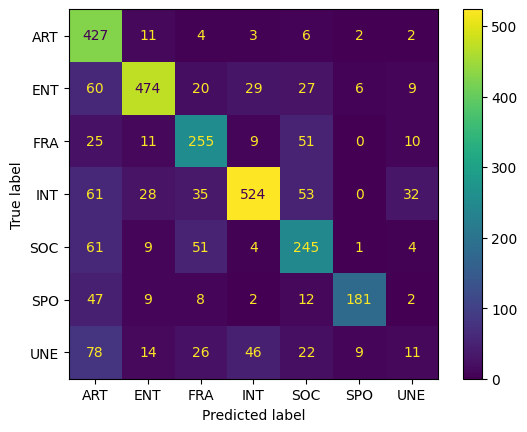

In [22]:
labels = clf.classes_
cm = confusion_matrix(y_true=y_dev, y_pred=y_pred,labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

/tmp/ipykernel_1879/2608727214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_filtered["category"].isin(['FRA','SOC']),"category"] = "SOFRA"


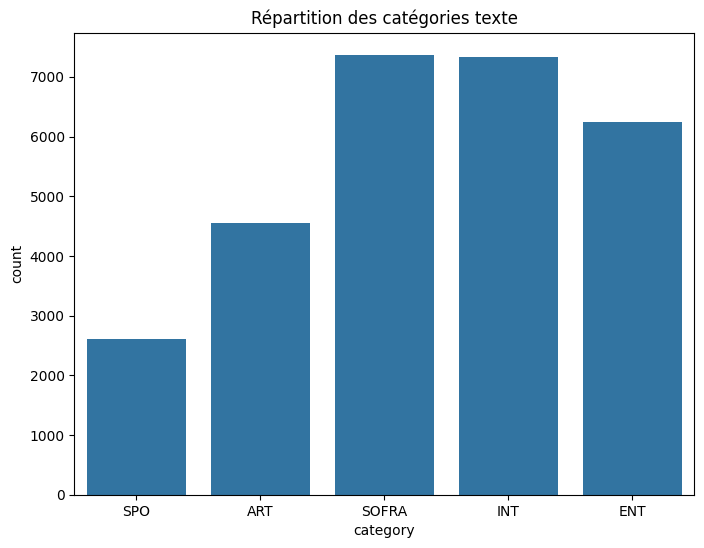

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
df_filtered = df[df["category"]!= "UNE"]
df_filtered.loc[df_filtered["category"].isin(['FRA','SOC']),"category"] = "SOFRA"
# Plot the statistics of classes
plt.figure(figsize=(8,6))
sns.countplot(data=df_filtered, x='category')
plt.title('Répartition des catégories texte')
plt.show()


In [32]:
# Make the splits and print the sizes for checking

X = df_filtered["text"]
y = df_filtered["category"]
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# split dev and test
X_dev, X_test, y_dev, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)





In [33]:
# Apply TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)

X_train_tf = vectorizer.fit_transform(X_train)
X_dev_tf   = vectorizer.transform(X_dev)

In [34]:

clf = MultinomialNB()
# Train 
clf.fit(X_train_tf,y_train)
# Evaluate 
clf.score(X_dev_tf,y_dev)



0.8367129135538954

              precision    recall  f1-score   support

         ART       0.86      0.86      0.86       455
         ENT       0.84      0.82      0.83       625
         INT       0.86      0.84      0.85       733
       SOFRA       0.77      0.88      0.82       737
         SPO       0.99      0.71      0.83       261

    accuracy                           0.84      2811
   macro avg       0.86      0.82      0.84      2811
weighted avg       0.84      0.84      0.84      2811



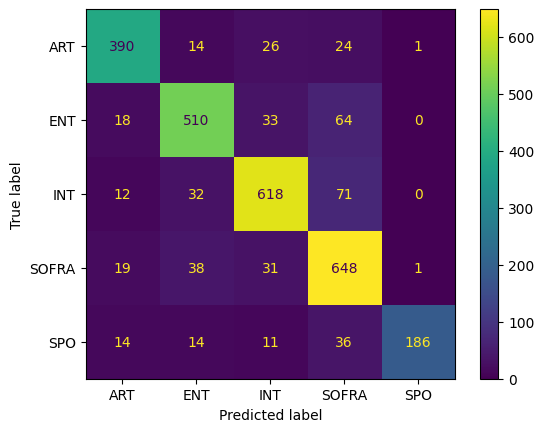

In [36]:
# Print accuracy

y_pred = clf.predict(X_dev_tf)

print(classification_report(y_true=y_dev, y_pred=y_pred))
# Print confusion matric
labels = clf.classes_
cm = confusion_matrix(y_true=y_dev, y_pred=y_pred,labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# Classification using sentence embeddings

Word embeddings were initially developed to calculate dense vector representations of words that encode syntax and semantics. Word embedding such as BERT can be extended and trained to encode the semantic meaning of sentences or short paragraphs. These models are trained using pairs of similar, neutral or contradictory sentences using a [Siamese neural network](https://en.wikipedia.org/wiki/Siamese_neural_network). The model is optimised to minimise the distance between the embeddings of similar sentences and maximise the distance between the embeddings of contradictory sentences. Once trained, these models can be used to encode documents of variable (but bounded) length into fixed-length embeddings.


In this section, we will use sentence embeddings to encode Le Monde articles and classify them with a simple Multi-layer Perceptron classifier. The [sentence-transformers library](https://www.sbert.net/index.html) makes it easy to encode documents into embeddings: https://www.sbert.net/examples/sentence_transformer/applications/computing-embeddings/README.html
The [paraphrase-multilingual-MiniLM-L12-v2](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) model allows texts in different languages with a maximum length of 128 tokens to be encoded into a single 384-dimensional embedding vector.

Your task is to
- load the paraphrase-multilingual-MiniLM-L12-v2 model
- merge the previous train and dev (into train_dev) sets because the MLP classifier uses part of the train set for [early stopping](https://en.wikipedia.org/wiki/Early_stopping)
- encode the train_dev and test texts with the embeddings model
- encode the targets of the train_dev and test sets. This encoding is needed because the MLP classifier does not handle string labels.
- define an [MLP classifier from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) 
- train the classifier on train_dev
- evaluate the classifier on test
- compare the results with the previous classifier







In [37]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

MODEL_NAME = 'paraphrase-multilingual-MiniLM-L12-v2'
# load the model
model = SentenceTransformer(MODEL_NAME)

# combine train and dev

X_train_dev = pd.concat([X_train, X_dev])
y_train_dev = pd.concat([y_train, y_dev])

# encode train_dev and test sets

X_train_dev_emb = model.encode(X_train_dev.tolist(), show_progress_bar=True)
X_test_emb = model.encode(X_test.tolist(), show_progress_bar=True)
# encode the targets

le = LabelEncoder()

y_train_dev_enc = le.fit_transform(y_train_dev)
y_test_enc = le.transform(y_test)

# define the MLP
clf = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    early_stopping=True,
    random_state=42
)

# train the classifier
clf.fit(X_train_dev_emb, y_train_dev_enc)

# evaluate the classifier
test_score = clf.score(X_test_emb, y_test_enc)
print("Test accuracy:", test_score)
print("Test error rate:", 1 - test_score)

/home/onyxia/work/nlp-lab-text-classification/nlp-env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 505.16it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Batches: 100%|██████████| 88/88 [00:06<00:00, 13.94it/s]


Test accuracy: 0.8754891497687656
Test error rate: 0.12451085023123443


## What about the LLMs?

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [ ]:
from transformers import pipeline
import time
from sklearn.metrics import accuracy_score


classifier = pipeline(
    "zero-shot-classification",
    model="mtheo/camembert-base-xnli"
)


labels = [
    "International",
    "Société ou France",
    "Arts",
    "Entreprises",
    "Sports"
]


text = X_test.iloc[0][:500]

result = classifier(text, labels)

print("Prediction example:")
print(result)

Loading weights: 100%|██████████| 201/201 [00:00<00:00, 525.82it/s, Materializing param=roberta.encoder.layer.11.output.dense.weight]              
CamembertForSequenceClassification LOAD REPORT from: mtheo/camembert-base-xnli
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Prediction example:
{'sequence': "des milliers de chiites se sont rassemblés lundi matin à nadjaf au sud de bagdad pour assister aux funérailles de deux gardes du corps et du chauffeur de l'ayatollah mohammad saïd al-hakim un attentat avait visé la veille la maison de ce dignitaire religieux l'un des quatre plus importants dignitaires chiites l'ayatollah avait reçu des menaces pour avoir prôné la patience et la paix à nadjaf", 'labels': ['entreprises', 'sports', 'arts', 'international', 'société ou France'], 'scores': [0.39978986978530884, 0.2227247655391693, 0.19370292127132416, 0.12365735322237015, 0.06012506037950516]}


In [ ]:
y_pred = []
y_true = y_test.iloc[:100]

start = time.time()

for text in X_test.iloc[:100]:
    result = classifier(text[:500], labels)
    y_pred.append(result["labels"][0])

end = time.time()

label_mapping = {
    "International": "INT",
    "Société ou France": "SOFRA",
    "Arts": "ART",
    "Entreprises": "ENT",
    "Sports": "SPO"
}


y_pred_codes = [label_mapping[label] for label in y_pred]
accuracy = accuracy_score(y_true, y_pred_codes)


print("Accuracy:", accuracy)
print("Error rate:", 1 - accuracy)
print("Total time:", end - start)
print("Time per article:", (end - start) / 100)

Accuracy: 0.4
Error rate: 0.6
Total time: 5.593153715133667
Time per article: 0.05593153715133667


French camembert Model Not really good in zero shot

In [46]:
from transformers import pipeline
import time
from sklearn.metrics import accuracy_score


classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)


labels = [
    "International",
    "Société ou France",
    "Arts",
    "Entreprises",
    "Sports"
]


text = X_test.iloc[0][:500]

result = classifier(text, labels)

print("Prediction example:")
print(result)

Loading weights: 100%|██████████| 515/515 [00:01<00:00, 465.74it/s, Materializing param=model.shared.weight]                                   


Prediction example:
{'sequence': "des milliers de chiites se sont rassemblés lundi matin à nadjaf au sud de bagdad pour assister aux funérailles de deux gardes du corps et du chauffeur de l'ayatollah mohammad saïd al-hakim un attentat avait visé la veille la maison de ce dignitaire religieux l'un des quatre plus importants dignitaires chiites l'ayatollah avait reçu des menaces pour avoir prôné la patience et la paix à nadjaf", 'labels': ['International', 'Arts', 'Entreprises', 'Sports', 'Société ou France'], 'scores': [0.39615628123283386, 0.24297693371772766, 0.18133850395679474, 0.10114928334951401, 0.07837895303964615]}


In [ ]:
y_pred = []
y_true = y_test.iloc[:100]

start = time.time()

for text in X_test.iloc[:100]:
    result = classifier(text[:500], labels)
    y_pred.append(result["labels"][0])

end = time.time()

label_mapping = {
    "International": "INT",
    "Société ou France": "SOFRA",
    "Arts": "ART",
    "Entreprises": "ENT",
    "Sports": "SPO"
}


y_pred_codes = [label_mapping[label] for label in y_pred]
accuracy = accuracy_score(y_true, y_pred_codes)


print("Accuracy:", accuracy)
print("Error rate:", 1 - accuracy)
print("Total time:", end - start)
print("Time per article:", (end - start) / 100)

In [ ]:
le modèle 